##### Tecnológico de Costa Rica
##### Programa de Ciencia de Datos
##### Aprendizaje Automático
##### Prof. Ing. Felipe Meza-Obando, MSc
##### Estudiante: Te Chen Huang
##### Proyecto Final

# Rendimiento de los estudiantes en los exámenes

Este proyecto se utlizará el conjunto de datos que consiste en las notas obtenidas de los estudiantes en diferentes materias con el objetivo de verificar cuáles son los principales factores que contribuyen a los resultados de las pruebas. Este ejercicio se trata de predecir la columna "Writing score" (nota de escritura) y entender si los hábitos de los estudiantes y las notas de reading afectan el resultado del examen de writing. Este conjunto fue tomado de la página Kaggle: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

Este conjunto de datos tiene los siguientes campos:
- Gender - Género
- Race/Ethnicity - Raza/Etnia
- Parental level of education - Nivel de estudios de los padres
- Lunch - almuerzo
- Test preparation course - Preparación para el examen
- Math score - Nota de prueba de matemática
- Reading score - Nota de prueba de lectura
- Writing score - Nota de prueba de escritura

### Las siguientes son bibliotecas utilizadas para este proyecto:

In [1]:
%matplotlib inline
import torch as torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import plotly.graph_objects as go
from math import e
from mpl_toolkits import mplot3d
import seaborn as sns
import math
from numpy import vstack
from numpy import sqrt
from numpy import array
from pandas import read_csv, notnull
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torch import Tensor
from torch.nn import Linear
from torch.nn import Sigmoid
from torch.nn import Module
from torch.optim import SGD
from torch.nn import MSELoss
from torch.nn.init import xavier_uniform_
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.utils import check_random_state, check_array
from sklearn.model_selection import ParameterGrid
from sklearn.dummy import DummyRegressor
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from sklearn.model_selection import cross_val_score
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

### Sección 1 - EDA antes del pre-procesamiento:

Antes de realizar el pre-procesamiento de datos se va a realizar una exploración de datos (EDA - Exploratory Data Analysis) que es un proceso fundamental para entender y realizar investigaciones preliminares sobre los datos con el fin de ver las diferencias, relaciones, patrones con el objetivo de realizar una limpieza adecuada de los datos.

##### Primero se va a cargar el csv usando la biblioteca panda

In [2]:
# Se utilza panda para cargar el csv
df = pd.read_csv('StudentsPerformance.csv')
print(df)

     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72         

##### Imprimir las columnas del conjunto de datos

In [3]:
# Mostrar las colummas
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

##### Se va a guardar los nombres de las columnas en una lista para realizar gráficas luego

In [4]:
# Guardar los nombres de las columnas en una lista
columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score','writing score']

##### Imprimir el tipo de cada columna

In [5]:
# Desplegar la lista de columnas 
df.columns
print(df.dtypes)

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


##### Tamaño del conjunto

In [6]:
df.shape

(1000, 8)

##### Dimension del conjunto

In [7]:
df.ndim

2

###### Retornar las primeras 5 filas del conjunto

In [8]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


##### Retornar las últimas 5 filas del conjunto

In [9]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


##### Desplejar la cantidad de valores únicos por columna

In [10]:
df.nunique( )

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

##### Cantidad de nan de todo el dataframe

In [11]:
df.isna().sum().sum()

0

##### Retorna el número de valores nulos de cada columna

In [12]:
df.isnull( ).sum( )

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

##### La siguiente función imprime el mapa de calor de las columnas que son númericas 

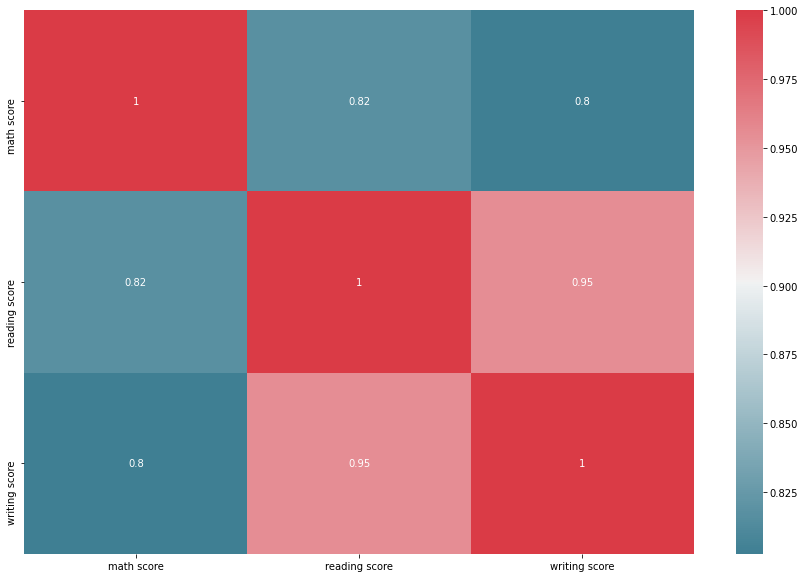

In [13]:
def correlation_heatmap(df1):
    _,ax=plt.subplots(figsize=(15,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(df.corr(),annot=True,cmap=colormap)
    
correlation_heatmap(df)

##### La siguiente gráfica presenta la relación entre pares de variables. En la diagonal se ven los histogramas de cada variable y esta presenta la relación entre las notas de diferentes cursos

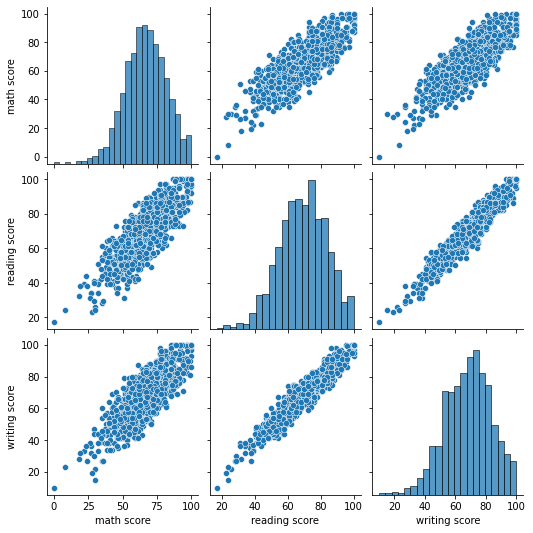

In [14]:
sns.pairplot(df);

##### Retorna las primeras 15 filas de mejores notas en mate

In [15]:
df.nlargest(15,"math score")

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
149,male,group E,associate's degree,free/reduced,completed,100,100,93
451,female,group E,some college,standard,none,100,92,97
458,female,group E,bachelor's degree,standard,none,100,100,100
623,male,group A,some college,standard,completed,100,96,86
625,male,group D,some college,standard,completed,100,97,99
916,male,group E,bachelor's degree,standard,completed,100,100,100
962,female,group E,associate's degree,standard,none,100,100,100
114,female,group E,bachelor's degree,standard,completed,99,100,100
263,female,group E,high school,standard,none,99,93,90
306,male,group E,some college,standard,completed,99,87,81


##### Retorna las primeras 15 filas de peores notas en mate

In [16]:
df.nsmallest(15,"math score")

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,0,17,10
980,female,group B,high school,free/reduced,none,8,24,23
17,female,group B,some high school,free/reduced,none,18,32,28
787,female,group B,some college,standard,none,19,38,32
145,female,group C,some college,free/reduced,none,22,39,33
842,female,group B,high school,free/reduced,completed,23,44,36
338,female,group B,some high school,free/reduced,none,24,38,27
466,female,group D,associate's degree,free/reduced,none,26,31,38
91,male,group C,high school,free/reduced,none,27,34,36
363,female,group D,some high school,free/reduced,none,27,34,32


##### Retorna las primeras 15 filas de mejores notas en reading

In [17]:
df.nlargest(15,"reading score")

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
106,female,group D,master's degree,standard,none,87,100,100
114,female,group E,bachelor's degree,standard,completed,99,100,100
149,male,group E,associate's degree,free/reduced,completed,100,100,93
165,female,group C,bachelor's degree,standard,completed,96,100,100
179,female,group D,some high school,standard,completed,97,100,100
381,male,group C,associate's degree,standard,completed,87,100,95
458,female,group E,bachelor's degree,standard,none,100,100,100
546,female,group A,some high school,standard,completed,92,100,97
566,female,group E,bachelor's degree,free/reduced,completed,92,100,100
594,female,group C,bachelor's degree,standard,completed,92,100,99


##### Retorna las primeras 15 filas de peores notas en reading

In [18]:
df.nsmallest(15,"reading score")

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,0,17,10
327,male,group A,some college,free/reduced,none,28,23,19
596,male,group B,high school,free/reduced,none,30,24,15
980,female,group B,high school,free/reduced,none,8,24,23
76,male,group E,some high school,standard,none,30,26,22
211,male,group C,some college,free/reduced,none,35,28,27
601,female,group C,high school,standard,none,29,29,30
896,male,group B,high school,free/reduced,none,36,29,27
466,female,group D,associate's degree,free/reduced,none,26,31,38
810,male,group A,some high school,standard,none,51,31,36


##### Retorna las primeras 15 filas de mejores notas en writing

In [19]:
df.nlargest(15,"writing score")

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
106,female,group D,master's degree,standard,none,87,100,100
114,female,group E,bachelor's degree,standard,completed,99,100,100
165,female,group C,bachelor's degree,standard,completed,96,100,100
179,female,group D,some high school,standard,completed,97,100,100
377,female,group D,master's degree,free/reduced,completed,85,95,100
403,female,group D,high school,standard,completed,88,99,100
458,female,group E,bachelor's degree,standard,none,100,100,100
566,female,group E,bachelor's degree,free/reduced,completed,92,100,100
685,female,group E,master's degree,standard,completed,94,99,100
903,female,group D,bachelor's degree,free/reduced,completed,93,100,100


##### Retorna las primeras 15 filas de peores notas en writing

In [20]:
df.nsmallest(15,"writing score")

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,0,17,10
596,male,group B,high school,free/reduced,none,30,24,15
327,male,group A,some college,free/reduced,none,28,23,19
76,male,group E,some high school,standard,none,30,26,22
980,female,group B,high school,free/reduced,none,8,24,23
211,male,group C,some college,free/reduced,none,35,28,27
338,female,group B,some high school,free/reduced,none,24,38,27
896,male,group B,high school,free/reduced,none,36,29,27
17,female,group B,some high school,free/reduced,none,18,32,28
601,female,group C,high school,standard,none,29,29,30


##### Las siguientes gráficas gráficas nos permiten visualizar mejor las relaciones entre diferentes atributos y ver la cantidad de valores únicos que hay por columna

##### Columna gender 

gender
female    518
male      482
dtype: int64


<AxesSubplot:xlabel='gender'>

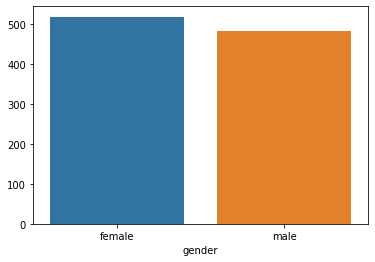

In [21]:
# utilizar la función groupby() para agrupar la columna de gender 
# y aplicar la función size()
# size() equivale a contar las filas distintas
result = df.groupby(['gender']).size()
print(result)
# graficar los resultados
sns.barplot(x = result.index, y = result.values)

##### Columna race/ethnicity 

<AxesSubplot:xlabel='race/ethnicity'>

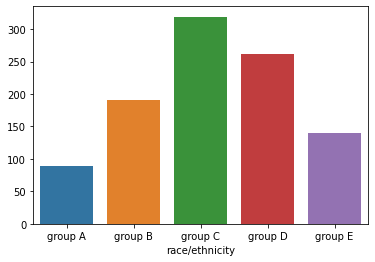

In [22]:
# utilizar la función groupby() para agrupar la columna de race/ethnicity 
# y aplicar la función size()
# size() equivale a contar las filas distintas
result = df.groupby(['race/ethnicity']).size()
# graficar los resultados
sns.barplot(x = result.index, y = result.values)

##### Columna race/ethnicity 

parental level of education
associate's degree    222
bachelor's degree     118
high school           196
master's degree        59
some college          226
some high school      179
dtype: int64


<AxesSubplot:xlabel='parental level of education'>

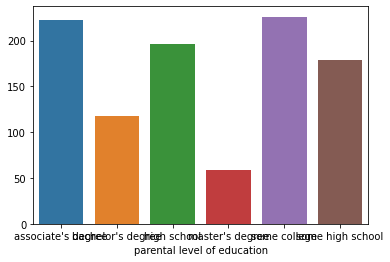

In [23]:
# utilizar la función groupby() para agrupar la columna de parental level of education 
# y aplicar la función size()
# size() equivale a contar las filas distintas
result = df.groupby(['parental level of education']).size()
print(result)
# graficar los resultados
sns.barplot(x = result.index, y = result.values)

##### Columna lunch

lunch
free/reduced    355
standard        645
dtype: int64


<AxesSubplot:xlabel='lunch'>

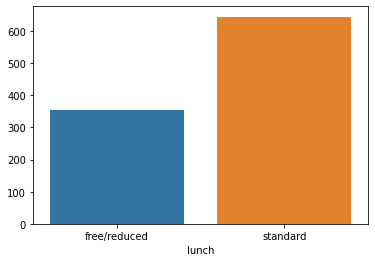

In [24]:
# utilizar la función groupby() para agrupar la columna de test preparation lunch  
# y aplicar la función size()
# size() equivale a contar las filas distintas
result = df.groupby(['lunch']).size()
print(result)
# graficar los resultados
sns.barplot(x = result.index, y = result.values)

##### Columna de test preparation course 

test preparation course
completed    358
none         642
dtype: int64


<AxesSubplot:xlabel='test preparation course'>

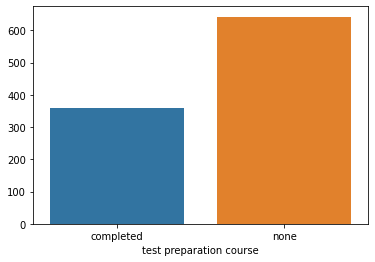

In [25]:
# utilizar la función groupby() para agrupar la columna de test preparation course 
# y aplicar la función size()
# size() equivale a contar las filas distintas
result = df.groupby(['test preparation course']).size()
print(result)
# graficar los resultados
sns.barplot(x = result.index, y = result.values)

##### Columna de math score

math score
0      1
8      1
18     1
19     1
22     1
      ..
96     3
97     6
98     3
99     3
100    7
Length: 81, dtype: int64


<AxesSubplot:xlabel='math score'>

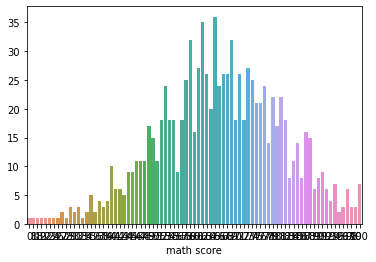

In [26]:
# utilizar la función groupby() para agrupar la columna de math score
# y aplicar la función size()
# size() equivale a contar las filas distintas
result = df.groupby(['math score']).size()
print(result)
# graficar los resultados
sns.barplot(x = result.index, y = result.values)

##### Columna de reading score 

reading score
17      1
23      1
24      2
26      1
28      1
       ..
95      8
96      4
97      5
99      3
100    17
Length: 72, dtype: int64


<AxesSubplot:xlabel='reading score'>

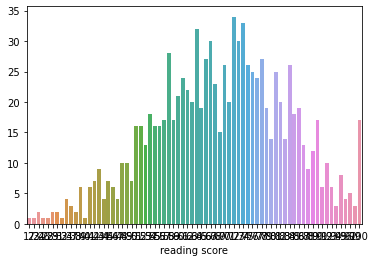

In [27]:
# utilizar la función groupby() para agrupar la columna de reading score 
# y aplicar la función size()
# size() equivale a contar las filas distintas
result = df.groupby(['reading score']).size()
print(result)
# graficar los resultados
sns.barplot(x = result.index, y = result.values)

##### Columna writing score

writing score
10      1
15      1
19      1
22      1
23      1
       ..
96      4
97      2
98      2
99      4
100    14
Length: 77, dtype: int64


<AxesSubplot:xlabel='writing score'>

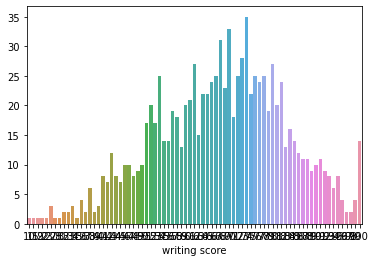

In [28]:
# utilizar la función groupby() para agrupar la columna de writing score
# y aplicar la función size()
# size() equivale a contar las filas distintas
result = df.groupby(['writing score']).size()
print(result)
# graficar los resultados
sns.barplot(x = result.index, y = result.values)

##### La siguiente gráfica presentación la relación entre math score y reading score 

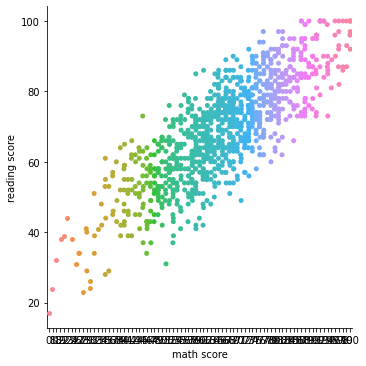

In [29]:
sns.catplot(x='math score', y = 'reading score', data = df)

##### La siguiente gráfica es el map de calor de las columnas numericas 

<AxesSubplot:>

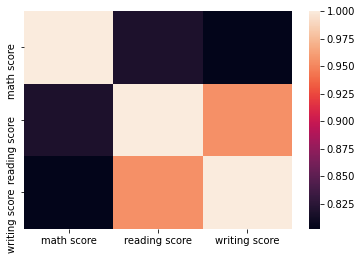

In [30]:
sns.heatmap(df.corr()) 

##### La siguiente gráfica presentación la relación entre writing score y reading score  

/home/te/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/te/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


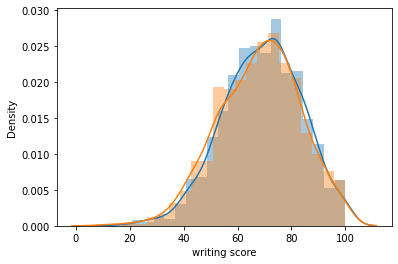

In [31]:
sns.distplot(df['reading score'])
sns.distplot(df['writing score']);

##### La siguiente gráfica presentación la relación entre math score y reading score  

/home/te/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/te/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


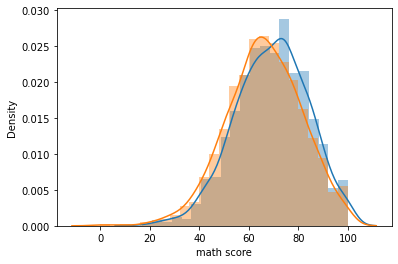

In [32]:
sns.distplot(df['reading score'])
sns.distplot(df['math score']);

##### La siguiente gráfica presentación la relación entre writing score y math score  

/home/te/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/te/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


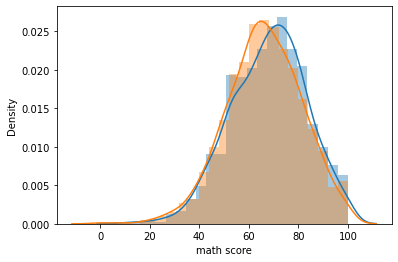

In [33]:
sns.distplot(df['writing score'])
sns.distplot(df['math score']);

### Sección 2 Pre-proceamiento 

Después de explorar un poco los datos en la sección anterior, ahora en esta se va a realizar un pre procesamiento de datos. Como se sabe que el pre procesamiento es esencial en este proceso, ya que el conjunto de datos se preprocesa para comprobar los valores que faltan, los datos con ruido y otras incoherencias antes de ejecutarlo en el algoritmo.  Como se pueden revisar en la sección anterior, este conjunto de datos no tienen valores nulos entonces no se tuvo que llenar o eliminar columnas. 

Para este trabajo decidí que todas las columnas del conjunto fueran númericas, ya que a la hora de hacer pruebas los resultados son mejores cuando todas las columnas son númericas. En los siguientes bloques de código se van a convertir aquellas columnas de stirng a númericas.

##### En el siguiente bloque está conviertiendo la columna test preparation course a una columna númerica
##### 1 si es completed and 0 si es none

In [34]:
# 1 si es completed and 0 si es none
df['test preparation course'] = np.where(df['test preparation course']=='completed', 1, 0)
df['test preparation course'] 

0      0
1      1
2      0
3      0
4      0
      ..
995    1
996    0
997    1
998    1
999    0
Name: test preparation course, Length: 1000, dtype: int64

##### En el siguiente bloque está conviertiendo la columna lunch a una columna númerica
##### 1 si es standard and 0 si es free/reduced 

In [35]:
# 1 si es standard and 0 si es free/reduced 
df['lunch'] = np.where(df['lunch']=='standard', 1, 0)
df['lunch'] 

0      1
1      1
2      1
3      0
4      1
      ..
995    1
996    0
997    0
998    1
999    0
Name: lunch, Length: 1000, dtype: int64

##### En el siguiente bloque está conviertiendo la columna gender a una columna númerica
##### 1 si es female and 0 si es male

In [36]:
# 1 si es female and 0 si es male
df['gender'] = np.where(df['gender']=='female', 1, 0)
df['gender']

0      1
1      1
2      1
3      0
4      0
      ..
995    1
996    0
997    1
998    1
999    1
Name: gender, Length: 1000, dtype: int64

##### En el siguiente bloque está conviertiendo la columna "parental level of education" a una columna númerica
- 1 si es some high school
- 2 si es high school
- 3 si es some college
- 4 si es bachelor's degree
- 5 si es associate's degree
- 6 si es master's degree

In [37]:
# 1 si es some high school
# 2 si es high school
# 3 si es some college
# 4 si es bachelor's degree
# 5 si es associate's degree
# 6 si es master's degree
df["parental level of education"].replace({"some high school": 1, "high school": 2,  "some college": 3,"bachelor's degree":4, "associate's degree":5, "master's degree":6}, inplace=True)

##### En el siguiente bloque está conviertiendo la columna "race/ethnicity" a una columna númerica
- 1 si es group A
- 2 si es group B
- 3 si es group C
- 4 si es group D
- 5 si es group E

In [168]:
# 1 si es group A
# 2 si es group B
# 3 si es group C
# 4 si es group D
# 5 si es group E
df["race/ethnicity"].replace({"group A": 1, "group B": 2,  "group C": 3,"group D":4, "group E":5}, inplace=True)

### Sección 3 - EDA antes del pre-procesamiento:

Después de realizar el pre-procesamiento de datos se va a realizar de nuevo una exploración de datos (EDA - Exploratory Data Analysis) para entender mejor las relaciones ahora entre todas columnas que ahora son númericas, ya que como se había mencionado anteriormente este proceso es fundamental para entender los datos que tenemos y ver cuáles son otros cambios que se necesita hacer para tener un conjunto de datos limpio.

##### La siguiente gráfica muestra el comportamiento de math score

<AxesSubplot:xlabel='math score', ylabel='Density'>

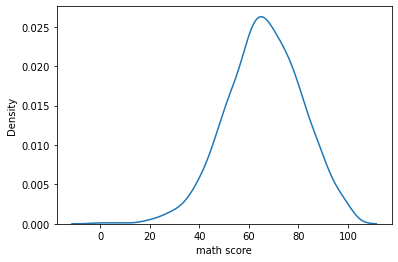

In [39]:
sns.kdeplot(df["math score"])

##### La siguiente gráfica muestra el comportamiento de reading score

<AxesSubplot:xlabel='reading score', ylabel='Density'>

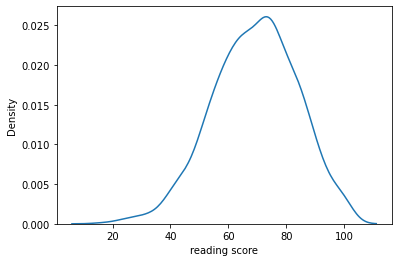

In [40]:
sns.kdeplot(df["reading score"])

##### La siguiente gráfica muestra el comportamiento de writing score

<AxesSubplot:xlabel='writing score', ylabel='Density'>

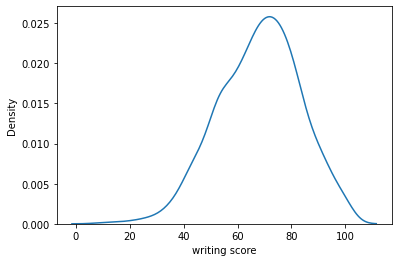

In [41]:
sns.kdeplot(df["writing score"])

##### Las siguientes gráficas gráficas nos permiten visualizar mejor las relaciones entre diferentes atributos y ver la cantidad de valores únicos que hay por columna

/home/te/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='reading score', ylabel='writing score'>

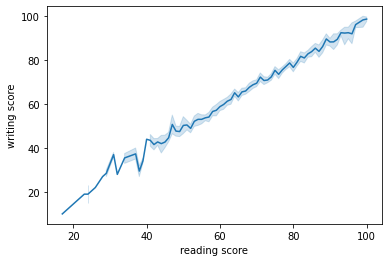

In [42]:
sns.lineplot(df['reading score'], df['writing score'])

##### La siguiente gráfica muestra la relación entre math score y writing score

/home/te/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='math score', ylabel='writing score'>

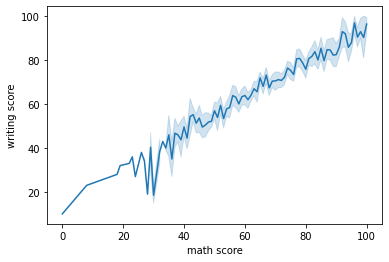

In [43]:
sns.lineplot(df['math score'], df['writing score'])

##### La siguiente gráfica muestra la relación entre math score y writing score

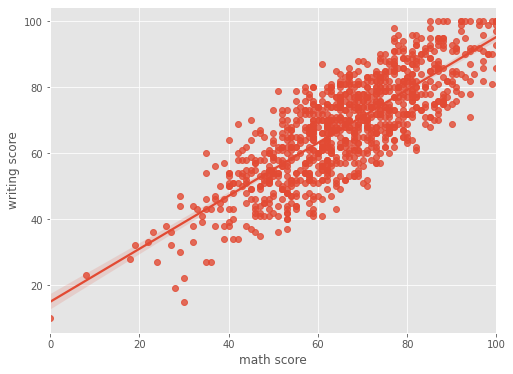

In [44]:
plt.style.use("ggplot")
plt.figure(figsize=(8,6))
sns.regplot(x = df["math score"], y = df["writing score"])
plt.show()

##### La siguiente gráfica muestra la relación entre reading score y writing score

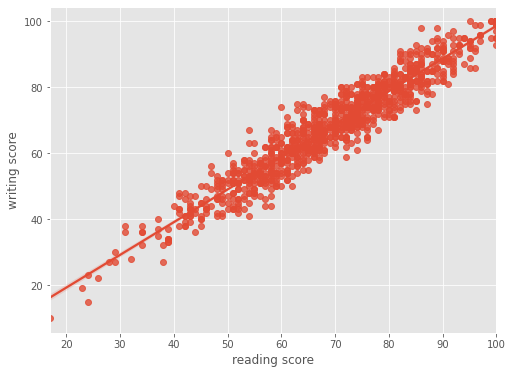

In [45]:
plt.style.use("ggplot")
plt.figure(figsize=(8,6))
sns.regplot(x = df["reading score"], y = df["writing score"])
plt.show()

##### La siguiente gráfica muestra la relación entre reading score y writing score

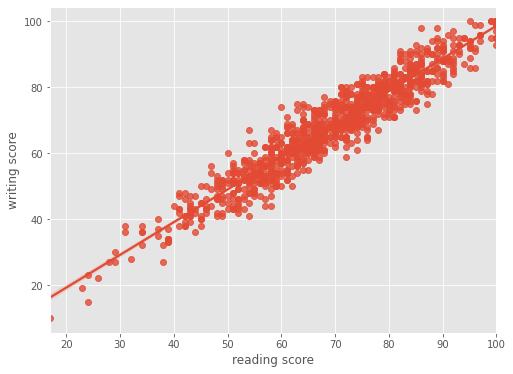

In [46]:
plt.style.use("ggplot")
plt.figure(figsize=(8,6))
sns.regplot(x = df["reading score"], y = df["writing score"])
plt.show()

##### La siguiente gráfica muestra la relación entre race/ethnicity score y writing score

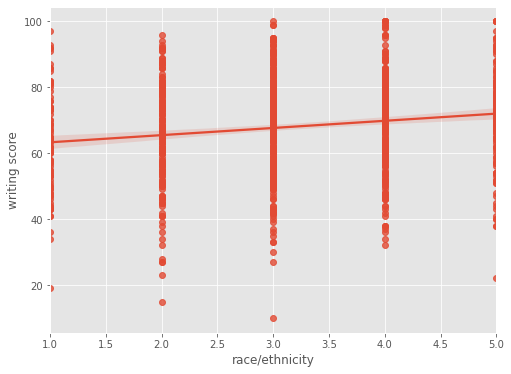

In [47]:
plt.style.use("ggplot")
plt.figure(figsize=(8,6))
sns.regplot(x = df["race/ethnicity"], y = df["writing score"])
plt.show()

##### La siguiente gráfica muestra la relación entre "parental level of education" score y writing score

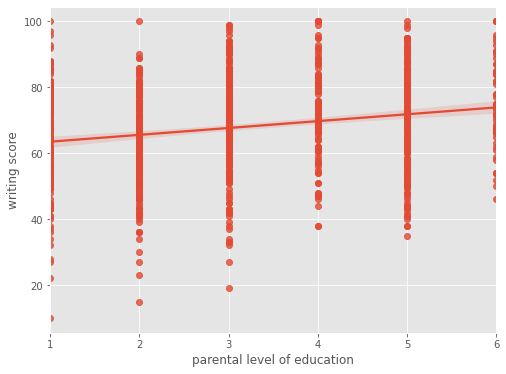

In [48]:
plt.style.use("ggplot")
plt.figure(figsize=(8,6))
sns.regplot(x = df["parental level of education"], y = df["writing score"])
plt.show()

##### La siguiente gráfica muestra la relación entre lunch y writing score

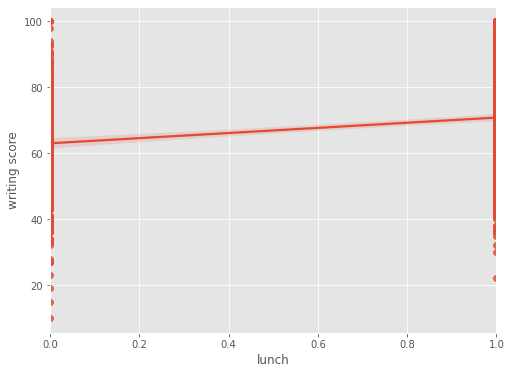

In [49]:
plt.style.use("ggplot")
plt.figure(figsize=(8,6))
sns.regplot(x = df["lunch"], y = df["writing score"])
plt.show()

##### Columna test preparation course 

test preparation course
0    642
1    358
dtype: int64


<AxesSubplot:xlabel='test preparation course'>

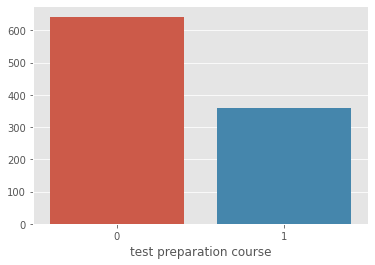

In [50]:
# 1 si es completed and 0 si es none
# utilizar la función groupby() para agrupar la columna de TestPreparationCourse
# y aplicar la función size()
# size() equivale a contar las filas distintas
result = df.groupby(['test preparation course']).size()
print(result)
# graficar los resultados
sns.barplot(x = result.index, y = result.values)

##### Columna lunch 

lunch
0    355
1    645
dtype: int64


<AxesSubplot:xlabel='lunch'>

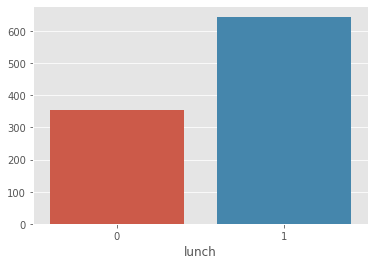

In [51]:
# 1 si es standard and 0 si es free/reduced 
# utilizar la función groupby() para agrupar la columna de TestPreparationCourse
# y aplicar la función size()
# size() equivale a contar las filas distintas
result = df.groupby(['lunch']).size()
print(result)
# graficar los resultados
sns.barplot(x = result.index, y = result.values)

##### Columna gender 

gender
0    482
1    518
dtype: int64


<AxesSubplot:xlabel='gender'>

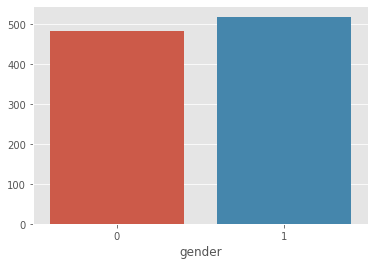

In [52]:
# 1 si es female and 0 si es gender
# utilizar la función groupby() para agrupar la columna de gender 
# y aplicar la función size()
# size() equivale a contar las filas distintas
result = df.groupby(['gender']).size()
print(result)
# graficar los resultados
sns.barplot(x = result.index, y = result.values)

##### Columna 'parental level of education' 

parental level of education
1    179
2    196
3    226
4    118
5    222
6     59
dtype: int64


<AxesSubplot:xlabel='parental level of education'>

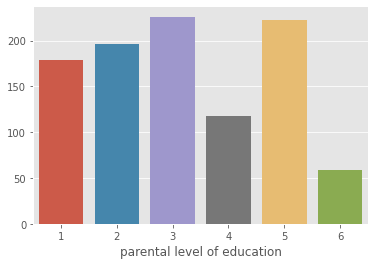

In [53]:
# 1 si es some high school
# 2 si es high school
# 3 si es some college
# 4 si es bachelor's degree
# 5 si es associate's degree
# 6 si es master's degree
# utilizar la función groupby() para agrupar la columna de parental level of education 
# y aplicar la función size()
# size() equivale a contar las filas distintas
result = df.groupby(['parental level of education']).size()
print(result)
# graficar los resultados
sns.barplot(x = result.index, y = result.values)

##### Columna 'race/ethnicity' 

race/ethnicity
1     89
2    190
3    319
4    262
5    140
dtype: int64


<AxesSubplot:xlabel='race/ethnicity'>

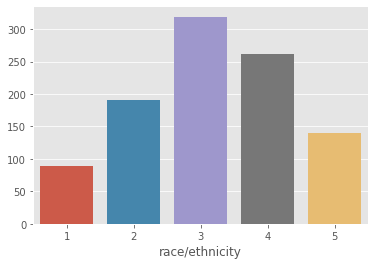

In [54]:
# 1 si es group A
# 2 si es group B
# 3 si es group C
# 4 si es group D
# 5 si es group E
# utilizar la función groupby() para agrupar la columna de race/ethnicity 
# y aplicar la función size()
# size() equivale a contar las filas distintas
result = df.groupby(['race/ethnicity']).size()
print(result)
# graficar los resultados
sns.barplot(x = result.index, y = result.values)

##### La siguiente función imprime el mapa de calor de todas columnas del conjunto y la relación 

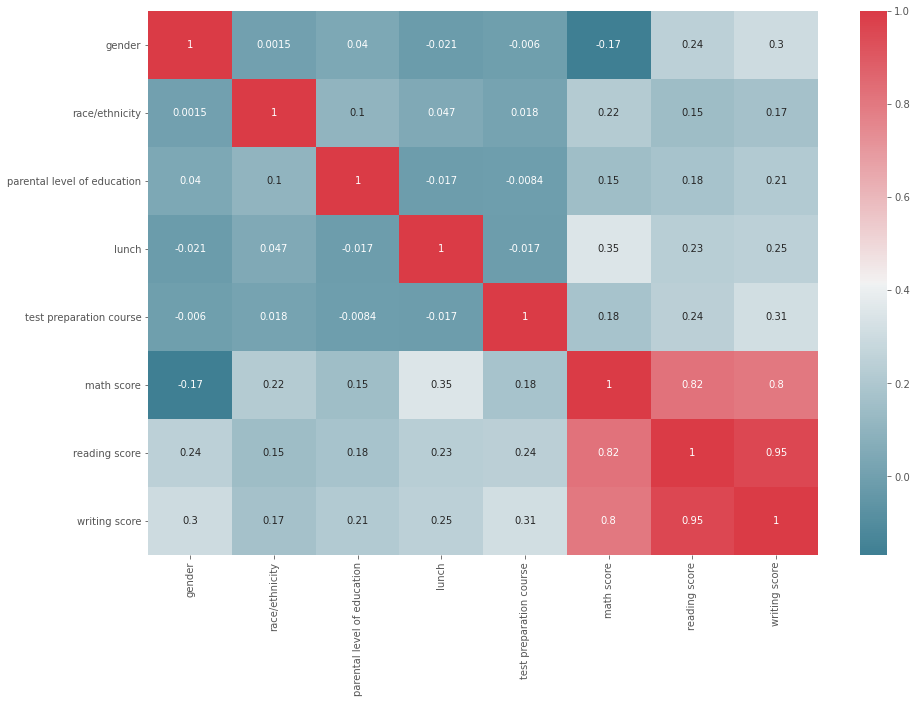

In [55]:
#Mapa de calor 

def correlation_heatmap(df1):

    _,ax=plt.subplots(figsize=(15,10))

    colormap=sns.diverging_palette(220,10,as_cmap=True)

    sns.heatmap(df.corr(),annot=True,cmap=colormap)

    

correlation_heatmap(df)

##### La siguiente gráfica presenta la relación entre pares de variables. 

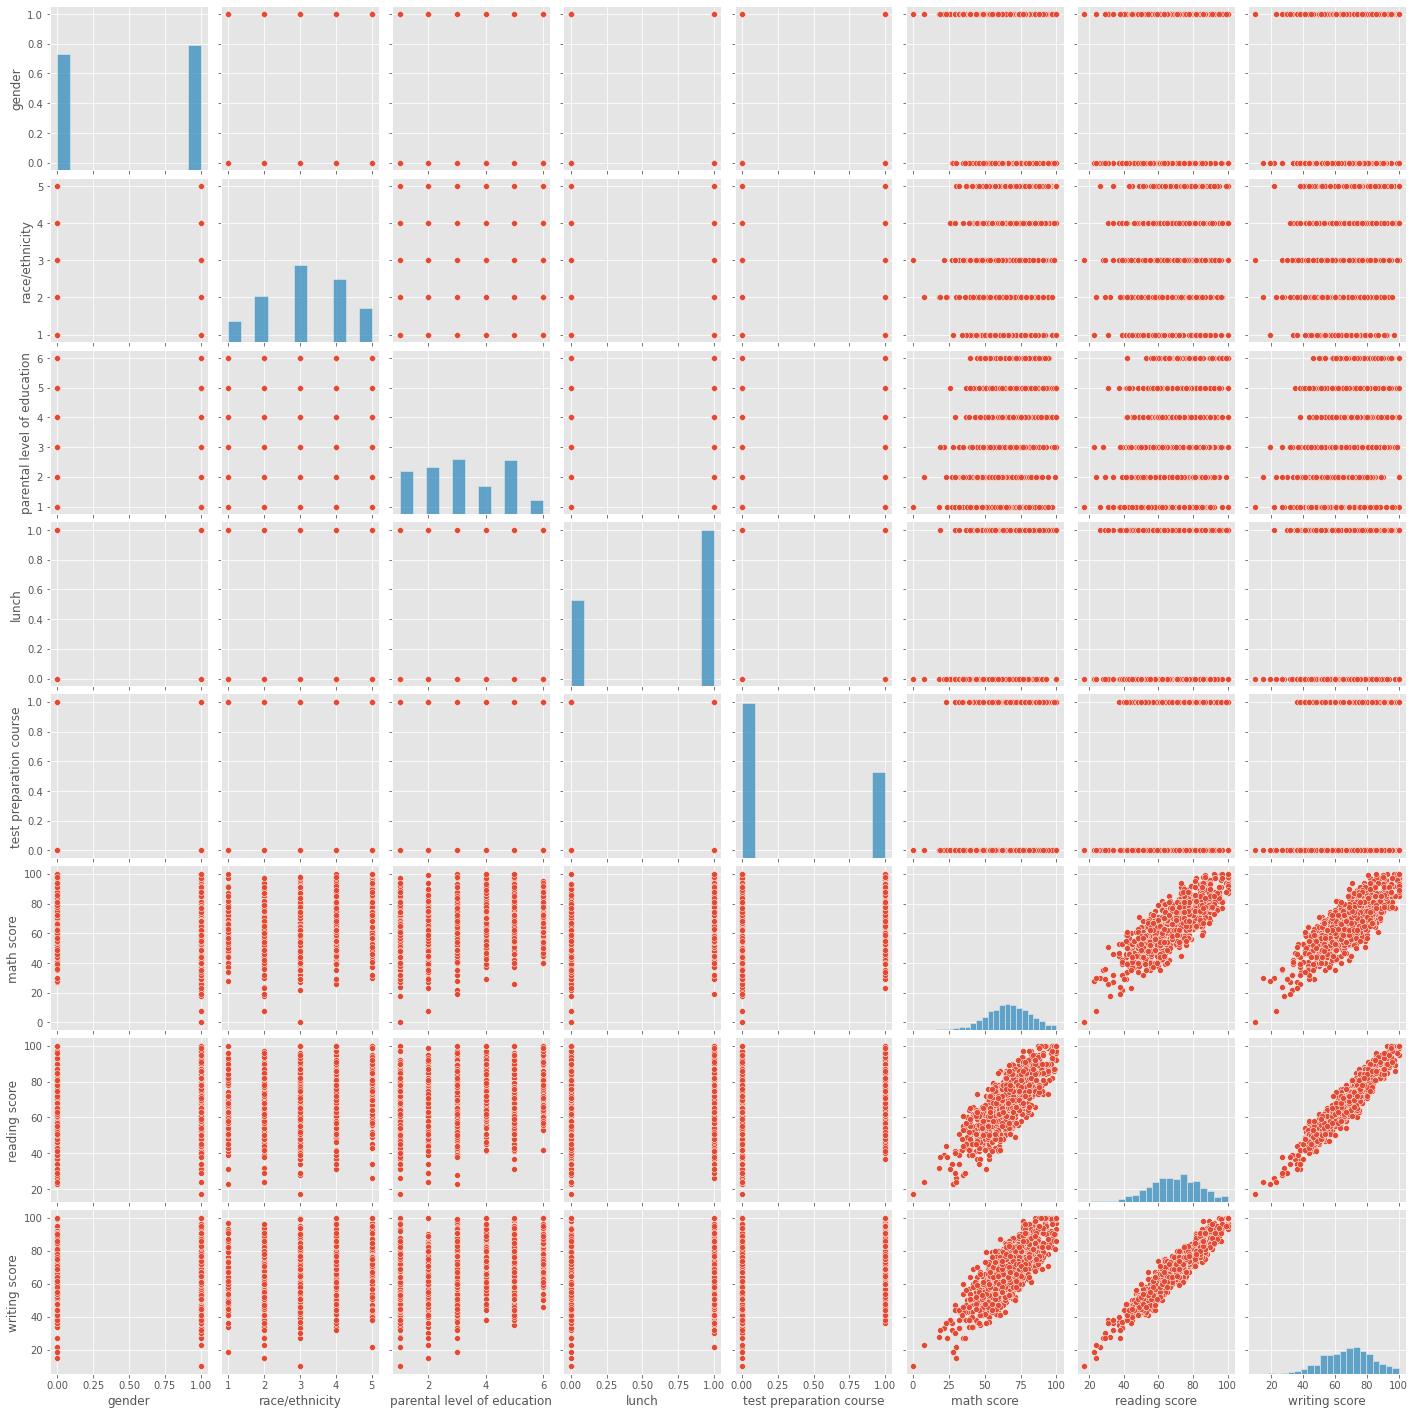

In [56]:
# La siguiente gráfica presenta la relación entre pares de variables. 
# En la diagonal se ven los histogramas de cada variable
# La segunda fila presenta la relación entre la variable precio y todas las demás
sns.pairplot(df);

##### Las siguientes gráficas se realizan comparaciones de como se ve writing score con otros atributos del conjunto de datos

##### La siguiente gráfica muestra la relación entre 'test preparation course' y writing score

<AxesSubplot:xlabel='test preparation course', ylabel='writing score'>

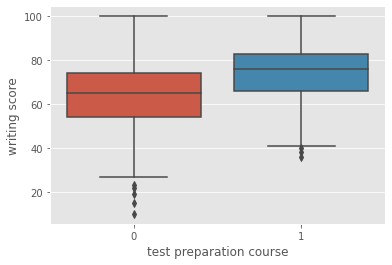

In [57]:
sorted_nb = df.groupby(['test preparation course'])['writing score'].median().sort_values()
sns.boxplot(x=df['test preparation course'], y=df['writing score'], order=list(sorted_nb.index))

##### La siguiente gráfica muestra la relación entre 'math score' y writing score

<AxesSubplot:xlabel='math score', ylabel='writing score'>

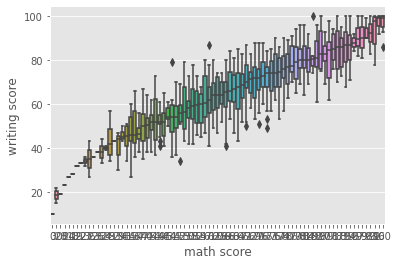

In [58]:
sorted_nb = df.groupby(['math score'])['writing score'].median().sort_values()
sns.boxplot(x=df['math score'], y=df['writing score'], order=list(sorted_nb.index))

##### La siguiente gráfica muestra la relación entre reading score y writing score

<AxesSubplot:xlabel='reading score', ylabel='writing score'>

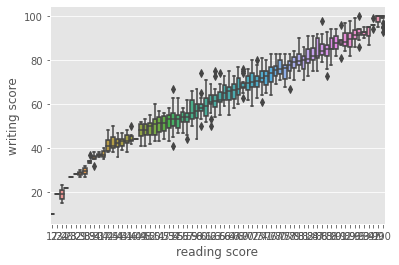

In [59]:
sorted_nb = df.groupby(['reading score'])['writing score'].median().sort_values()
sns.boxplot(x=df['reading score'], y=df['writing score'], order=list(sorted_nb.index))

##### La siguiente gráfica muestra la relación entre lunch y writing score

<AxesSubplot:xlabel='lunch', ylabel='writing score'>

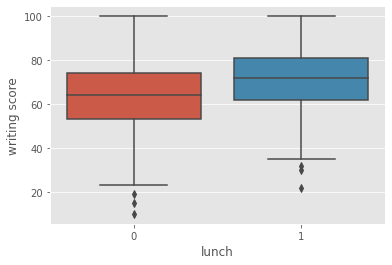

In [60]:
sorted_nb = df.groupby(['lunch'])['writing score'].median().sort_values()
sns.boxplot(x=df['lunch'], y=df['writing score'], order=list(sorted_nb.index))

##### La siguiente gráfica muestra la relación entre 'parental level of education' y writing score

<AxesSubplot:xlabel='parental level of education', ylabel='writing score'>

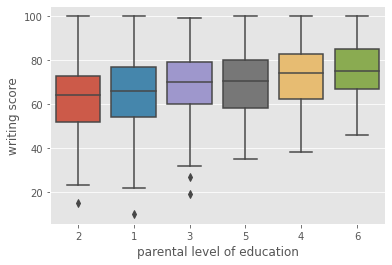

In [61]:
sorted_nb = df.groupby(['parental level of education'])['writing score'].median().sort_values()
sns.boxplot(x=df['parental level of education'], y=df['writing score'], order=list(sorted_nb.index))

##### La siguiente gráfica muestra la relación entre gender y writing score

<AxesSubplot:xlabel='gender', ylabel='writing score'>

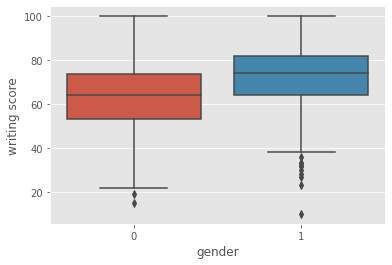

In [62]:
sorted_nb = df.groupby(['gender'])['writing score'].median().sort_values()
sns.boxplot(x=df['gender'], y=df['writing score'], order=list(sorted_nb.index))

##### La siguiente gráfica muestra la relación entre race/ethnicity y writing score

<AxesSubplot:xlabel='race/ethnicity', ylabel='writing score'>

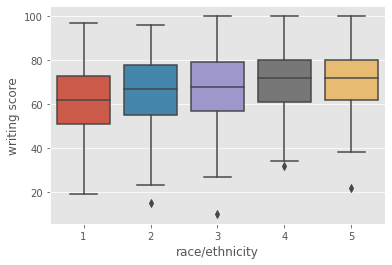

In [63]:
sorted_nb = df.groupby(['race/ethnicity'])['writing score'].median().sort_values()
sns.boxplot(x=df['race/ethnicity'], y=df['writing score'], order=list(sorted_nb.index))

##### El siguiente es el histograma de math score

Text(0.5, 1.0, 'Distribution of age of the players')

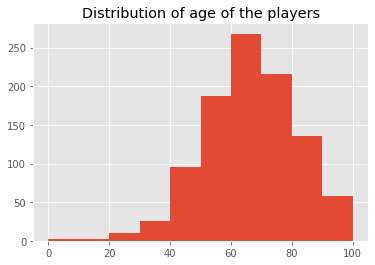

In [64]:
df['math score'].hist()
plt.title("Distribution of age of the players")

##### El siguiente es el histograma de reading score

Text(0.5, 1.0, 'Distribution of age of the players')

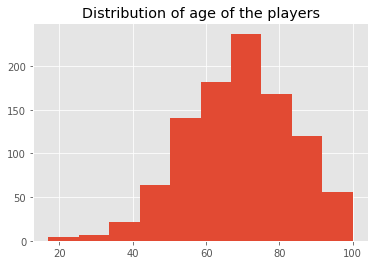

In [65]:
df['reading score'].hist()
plt.title("Distribution of age of the players")

##### El siguiente es el histograma de writing score

Text(0.5, 1.0, 'Distribution of age of the players')

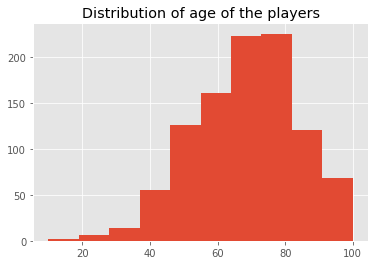

In [66]:
df['writing score'].hist()
plt.title("Distribution of age of the players")

##### La siguiente gráfica muestra la relación entre math, reading y writing score

/home/te/.local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/te/.local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


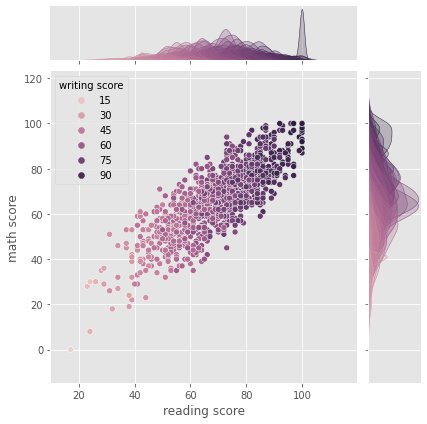

In [67]:
sns.jointplot(data=df, x="reading score", y="math score", hue="writing score")

##### La siguiente gráfica muestra como se comporta writing score

/home/te/.local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/te/.local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/te/.local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/te/.local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/te/.local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/te/.local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  

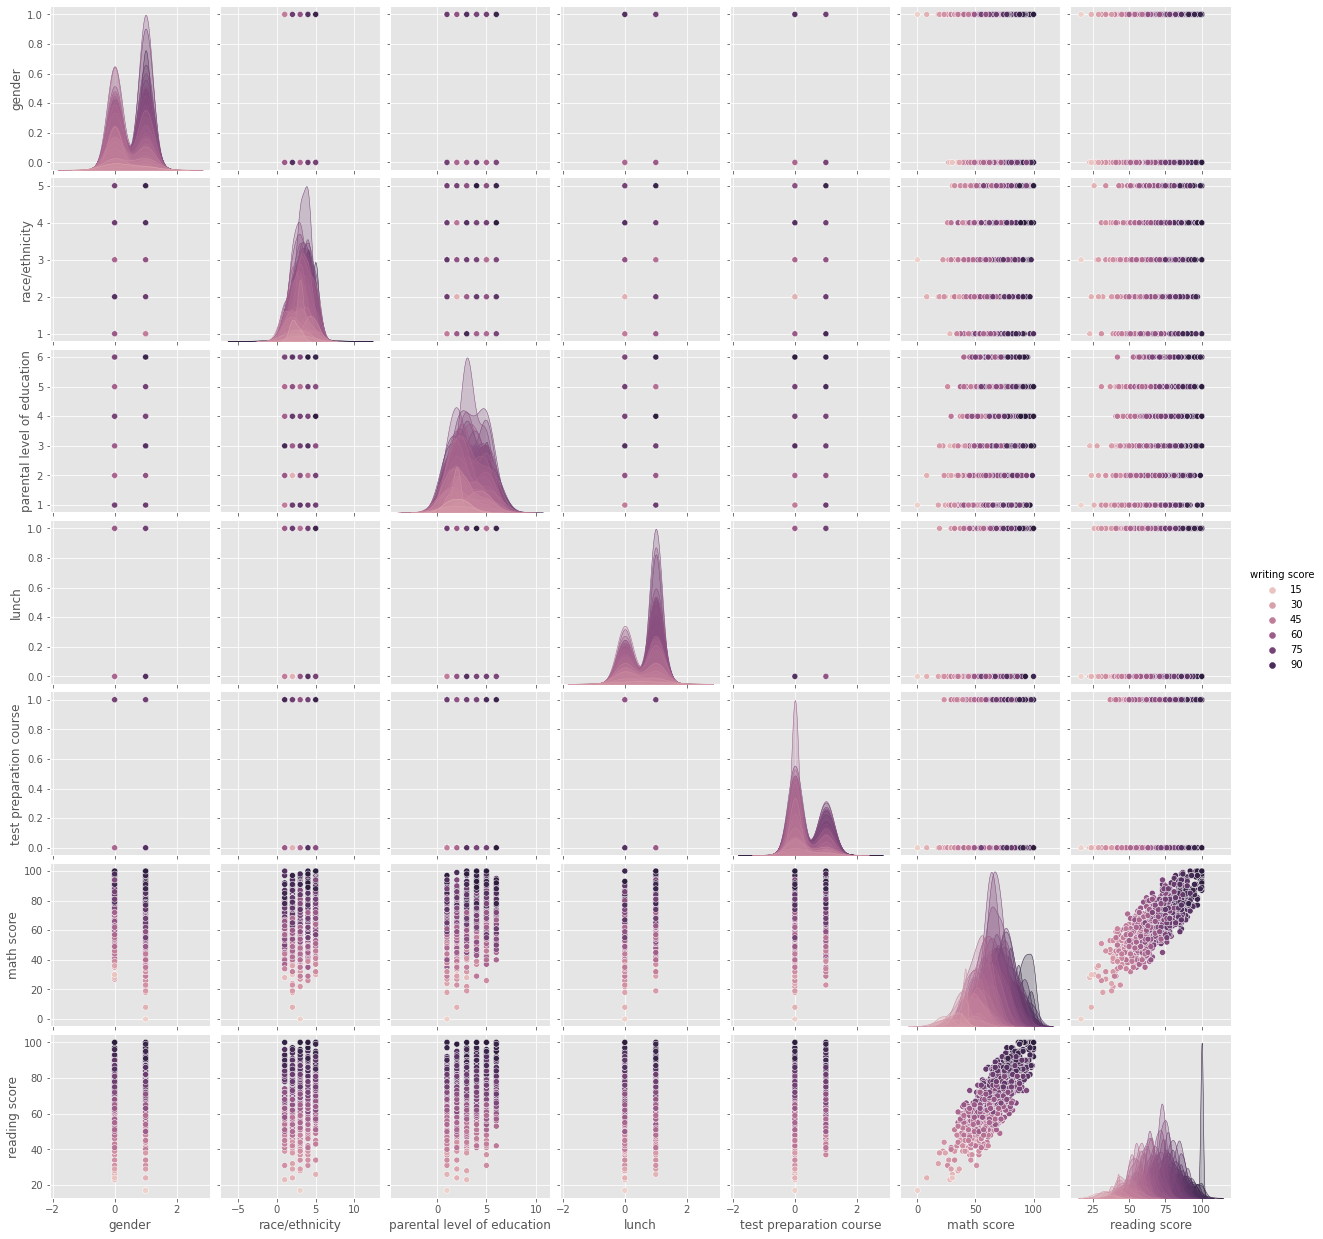

In [68]:
sns.pairplot(data=df, hue="writing score")

##### Imprimimos el conjunto de datos de nuevo

In [69]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,2,4,1,0,72,72,74
1,1,3,3,1,1,69,90,88
2,1,2,6,1,0,90,95,93
3,0,1,5,0,0,47,57,44
4,0,3,3,1,0,76,78,75
...,...,...,...,...,...,...,...,...
995,1,5,6,1,1,88,99,95
996,0,3,2,0,0,62,55,55
997,1,3,2,0,1,59,71,65
998,1,4,3,1,1,68,78,77


# Sección 4 - MODELO DE APRENDIZAJE

En los siguientes bloques se dividen el conjunto de datos en características y la columna que queremos que predir. En data se va a guardar las características que se van a utilizar para predecir el resultado, y en target se va a guardar el valor que queremos predecir de cada fila.  Se utilizaron las siguientes características para el entrenamiento de modelo: 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score' y'reading score'. No se utilizó la característica gender debido a que queremos prededir los estudiantes en general y no por su género, también se realizó una prueba y los resultados no hubieron mucha diferencia

In [121]:
#Pasar de dataframe a numpy 
data_numpy = df.to_numpy()
# # define min max scaler
# scaler = MinMaxScaler()
# # transform data
# scaled = scaler.fit_transform(data_numpy)
#Guardar las características en data
data = data_numpy[:,[1,2,3,4,5,6]]
#Guardar la última columna como target que queremos estimar 
target = data_numpy[:,7]

In [122]:
#Impimir las características
print(data)
print(len(data))

[[ 2  4  1  0 72 72]
 [ 3  3  1  1 69 90]
 [ 2  6  1  0 90 95]
 ...
 [ 3  2  0  1 59 71]
 [ 4  3  1  1 68 78]
 [ 4  3  0  0 77 86]]
1000


In [123]:
#Impimir las target
print(target)
print(len(target))

[ 74  88  93  44  75  78  92  39  67  50  52  43  73  70  58  78  86  28
  46  61  63  70  53  73  80  72  55  75  65  75  74  61  65  38  82  79
  83  59  88  57  54  68  65  66  54  57  62  76  76  82  48  68  42  75
  87  43  86  49  58  10  72  34  55  71  59  61  37  74  56  57  73  63
  48  56  41  38  22  81  72  68  50  45  54  63  34  82  88  74  67  82
  74  36  71  50  92  82  62  70  62  62  67  74  89  47  90  72 100  64
  70  72  98  49  47  54 100  74  82  79  61  65  89  92  93  56  73  86
  67  74  74  51  82  40  70  84  75  48  41  56  67  69  71  64  54  47
  78  33  75  66  81  93  69  68  66  47  61  88  78  60  87  64  74  85
  52  49  91 100  51  78  78  70  74  78  81  70  54  87  58  77  62 100
  75  66  47  70  49  65  65  68  45  87  69  79  66  62  85  52  65  51
  55  76  86  77  69  68  42  78  62  76  76  66  79  27  60  56  81  75
  88  39  70  56  74  73  62  75  73  54  71  54  64  94  66  42  83  78
  84  77  67  74  51  80  66  83  55  43  69  71  7

#### Comparación de algoritmos

##### En esta parte se va a realizar una comparación de los 5 modelos más utilizados para regresión que son los siguientes:
- Decision Tree
- Random Forest
- Bagging Regressor
- SGD Regressor
- Linear Regression

### Decision Tree

##### Separar los datos para entrenamientos(80%) y para pruebas (20%)

In [124]:
X_train,X_test,y_train,y_test=train_test_split(data,target,test_size=0.2)

##### Entrenamos el modelo usando hiperparámetros y ajustar el modelo con los datos de entranamiento

In [125]:
# Decision Tree
#Entrenar el modelo y utilizar máximo profundidad 2 
regression = DecisionTreeRegressor(max_depth=2,random_state = 10)
#Ajustar el modelo a los datos del training  
regression.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=2, random_state=10)

In [126]:
#Comprobar la puntuación de precisión del modelo
score = regression.score(X_train,y_train)
print("Score:", score) 

Score: 0.8097411190446397


##### Se utiliza el modelo entrenado para predecir los datos de entranamientos ya que esto nos permite ver y entender como fue el comportamiento con los datos de entrenamiento

In [127]:
#Utilizar el modelo entrenado para predecir los datos de entrenamientos
ypred_train = regression.predict(X_train)
#Usar las métricas de MSE para comprobar el resultado 
mse = mean_squared_error(y_train, ypred_train)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))

MSE:  44.14454068101057
RMSE:  22.072270340505284


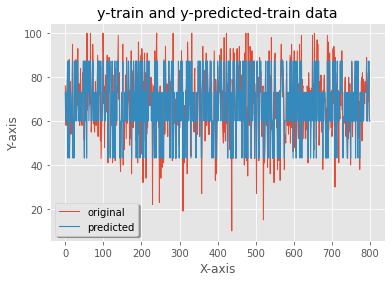

In [128]:
#Graficar las diferencias
x_ax = range(len(y_train))
plt.plot(x_ax, y_train, linewidth=1, label="original")
plt.plot(x_ax, ypred_train, linewidth=1.1, label="predicted")
plt.title("y-train and y-predicted-train data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

##### Se utiliza el modelo entrenado para predecir los datos de pruebas ya que esto nos permite ver y entender como fue el comportamiento con los datos de pruebas

In [129]:
#Utilizar el modelo entrenado para predecir los datos de pruebas
y_pred = regression.predict(X_test)
#Usar las métricas de MSE para comprobar el resultado 
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))

MSE:  42.400303371131265
RMSE:  21.200151685565633


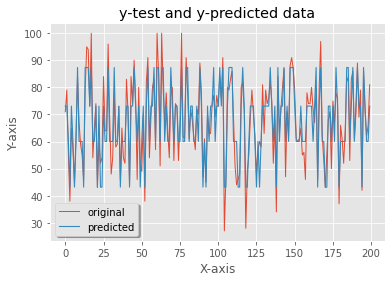

In [130]:
#Graficar las diferencias
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [131]:
# Mostrar el error de madiana y promedio absoluto 
print("median_absolute_error:",median_absolute_error(y_test,y_pred))
print("mean_absolute_percentage_error:",mean_absolute_percentage_error(y_test,y_pred))

median_absolute_error: 4.898181818181811
mean_absolute_percentage_error: 0.08593951047302813


#### Análisis y conclusión del modelo decision tree

La regresión de árbol de decisión entrena un modelo en forma de árbol a partir de las características para predecir datos nuevos. Al realizar pruebas con distintos hiperparámetros, se pudo observar que al realizar un pequeño cambio puede provocar un gran cambio en la estructura del árbol de decisión y el resultado también es muy inestable. 
En este caso,el score es casi 81% que considero bastante bueno con MSE de 42.400 y RMSE de 21.20.

Considero que el resultado obtenido con decision tree fue bueno debido a que el conjunto de datos en realidad que se está usando para este proyecto es pequeño ya que solo cuento con 800 filas de datos para el entrenamiento. Por otro lado, pienso que esta técnica no es tan buena para aplicar en regresión de predecir valores continous, al no ser un conjunto de valores discretos las decisiones son más complejas y tener mejor precisión. 
Para este conjunto de dato, lo que se está prediciendo es la nota de writing de lo estudiantes.

### Random Forest

##### Separar los datos para entrenamientos(80%) y para pruebas (20%)

In [132]:
X_train,X_test,y_train,y_test=train_test_split(data,target,test_size=0.2)

##### Entrenamos el modelo usando hiperparámetros y ajustar el modelo con los datos de entranamiento

In [133]:
#Entrenar el modelo y utilizar 10 estimadores 
regressor = RandomForestRegressor(n_estimators=10, random_state=0)
#Ajustar el modelo a los datos del training  
regressor.fit(X_train, y_train)
#Comprobar la puntuación de precisión del modelo
regressor.score(X_train, y_train)

0.9847837017968372

##### Se utiliza el modelo entrenado para predecir los datos de entranamientos ya que esto nos permite ver y entender como fue el comportamiento con los datos de entrenamiento

In [134]:
#Utilizar el modelo entrenado para predecir los datos de entrenamientos
y_pred_train = regressor.predict(X_train)

In [135]:
#Evaluar el modelo 
MAE = metrics.mean_absolute_error(y_train, y_pred_train)
MSE = metrics.mean_squared_error(y_train, y_pred_train)
RMSD = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
print("MAE: ",MAE)
print("MSE: ",MSE)
print("RMSE: ",RMSD)

MAE:  1.4589374999999996
MSE:  3.708639236111111
RMSE:  1.9257827593244028


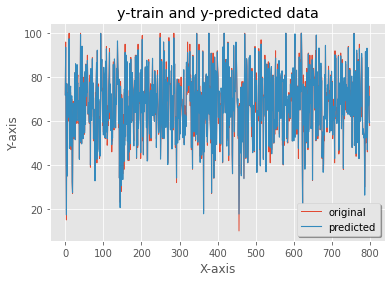

In [136]:
#Graficar las diferencias
x_ax = range(len(y_train))
plt.plot(x_ax, y_train, linewidth=1, label="original")
plt.plot(x_ax, y_pred_train, linewidth=1.1, label="predicted")
plt.title("y-train and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

##### Se utiliza el modelo entrenado para predecir los datos de pruebas ya que esto nos permite ver y entender como fue el comportamiento con los datos de pruebas

In [137]:
#Utilizar el modelo entrenado para predecir los datos de pruebas
y_pred = regressor.predict(X_test)

In [138]:
#Evaluar el modelo 
MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSD = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("MAE: ",MAE)
print("MSE: ",MSE)
print("RMSE: ",RMSD)

MAE:  3.76525
MSE:  22.6885375
RMSE:  4.76324862882466


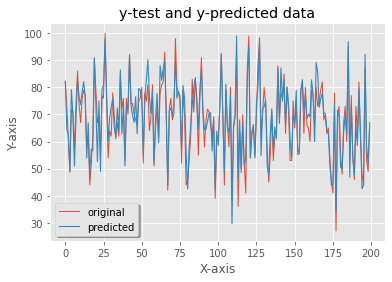

In [139]:
#Graficar las diferencias
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [140]:
# Mostrar el error de madiana y promedio absoluto 
print("median_absolute_error:",median_absolute_error(y_test,y_pred))
print("mean_absolute_percentage_error:",mean_absolute_percentage_error(y_test,y_pred))

median_absolute_error: 3.1000000000000014
mean_absolute_percentage_error: 0.05953103301757948


#### Análisis y conclusión del modelo Random Forest

De los 5 modelos que se probaron para este conjunto,el resultado del modelo Random Forest es el segundo mejor. El MSE obtenido en este caso es un valor de un dígito. Considero que este algoritmo puede manejar mejor el conjunto de datos que contiene variables continuas como se puede reflejar comparando los cincos algoritmos.

En el caso de Random Forest, si realizado cambios en los hiperparámetros los resultados no afectan tanto como los otros algoritmos.Este método trata de que las correlaciones sean bajas entre sí y por las características y los hiperparámetros pueden afectar a las correlaciones. El Random Forest selecciona los datos de manera random para construir el árbol de decisión y poder toma el resultado medio. No utiliza ningún conjunto de fórmulas y reglas como en el caso de Decision Tree, y esto puede ayudar a mejorar el resultado en este conjunto de datos debido a que todas las características son númericas.


### Bagging regressor

##### Separar los datos para entrenamientos(80%) y para pruebas (20%)

In [141]:
X_train,X_test,y_train,y_test=train_test_split(data,target,test_size=0.2)

##### Entrenamos el modelo usando hiperparámetros y ajustar el modelo con los datos de entranamiento

In [142]:
#Calcular RandomForestRegressor
rf = RandomForestRegressor(n_estimators=15, max_depth=6, random_state=0)
#Calcular BaggingRegressor utilizando los hiperparámetros del resultado de RandomForestRegressor,
#n_estimators, max_samples y random_state
clf = BaggingRegressor(rf, n_estimators=45, max_samples=0.1, random_state=25)


In [143]:
#Ajustar el modelo a los datos del training 
clf.fit(X_train, y_train)


BaggingRegressor(base_estimator=RandomForestRegressor(max_depth=6,
                                                      n_estimators=15,
                                                      random_state=0),
                 max_samples=0.1, n_estimators=45, random_state=25)

##### Se utiliza el modelo entrenado para predecir los datos de entranamientos ya que esto nos permite ver y entender como fue el comportamiento con los datos de entrenamiento

In [144]:
#Utilizar el modelo entrenado para predecir los datos de entranamientos
y_pred_train = clf.predict(X_train)

In [145]:
#Evaluar el modelo 
MSE = mean_squared_error(y_train, y_pred_train)
RMSE = mean_squared_error(y_train, y_pred_train)**0.5
print("MSE: ",MSE)
print("RMSE: ",RMSE)

MSE:  18.8207298931339
RMSE:  4.338286515795597


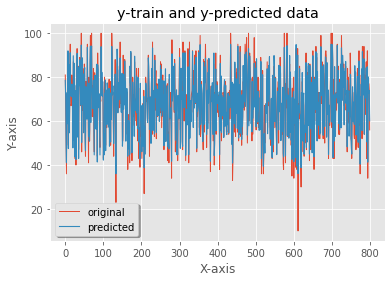

In [146]:
#Graficar las diferencias
x_ax = range(len(y_train))
plt.plot(x_ax, y_train, linewidth=1, label="original")
plt.plot(x_ax, y_pred_train, linewidth=1.1, label="predicted")
plt.title("y-train and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

##### Se utiliza el modelo entrenado para predecir los datos de pruebas ya que esto nos permite ver y entender como fue el comportamiento con los datos de pruebas

In [147]:
#Utilizar el modelo entrenado para predecir los datos de pruebas
y_pred = clf.predict(X_test)

In [148]:
#Evaluar el modelo 
MSE = mean_squared_error(y_test, y_pred)
RMSE = mean_squared_error(y_test, y_pred)**0.5
print("MSE: ",MSE)
print("RMSE: ",RMSE)


MSE:  27.242983640445654
RMSE:  5.219481165829191


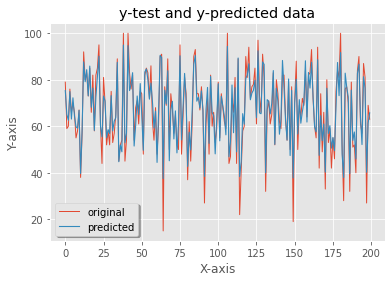

In [149]:


#Graficar las diferencias
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 



In [150]:
# Mostrar el error de madiana y promedio absoluto 
print("median_absolute_error:",median_absolute_error(y_test,y_pred))
print("mean_absolute_percentage_error:",mean_absolute_percentage_error(y_test,y_pred))

median_absolute_error: 3.533455125121801
mean_absolute_percentage_error: 0.07980191117818855


#### Análisis y conclusión del modelo Bagging regressor

El algoritmo Bagging regressor se ajusta basando en cada uno de los subconjuntos aleatorios del conjunto de datos orginal y luego agregar las predicciones individuales para formar una predicción final. 

En este caso según las gráficas anteriores el resultado de MSE es mucho mayor que el valor obtenido anteriormente de Random Forest pero está mejor que el resultado obtenido del algoritmo Decision Tree, creo que al utilizar Random Forest como una extensión para seleccionar aleatoriamente subconjuntos de características utilizadas en cada muestra de datos pueden influir en los resultados de manera positiva. Después de realizar varias pruebas creo que es díficil obtener resultados precisos a través de este algoritmo por su aleatoridad y al promedio de las predicciones, pero el resultado puede que sea mejor comparando con los otros métodos. 

Es un buen método para realizar cálculos de regresión que en este caso sería la nota de un curso. Investigando y haciendo pruebas se puede confirmar que este método puede mejorar la precision de la predicción para los modelos de alta varianza (y bajo sesgo) a expensas de la interpretabilidad.

### SGD Regressor

##### Separar los datos para entrenamientos(80%) y para pruebas (20%)

In [151]:
x = scale(data)
y = scale(target)
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

##### Entrenamos el modelo usando hiperparámetros y ajustar el modelo con los datos de entranamiento

In [152]:
sgdr = SGDRegressor()

In [153]:
sgdr.fit(X_train, y_train)

SGDRegressor()

In [154]:
#Utilizar el modelo entrenado para predecir los datos de entranamientos
# Then, we'll fit the model on train data and check the model accuracy score. 
score = sgdr.score(X_train, y_train)
print("R-squared:", score)

R-squared: 0.9218217496979096


In [155]:
#We can also apply a cross-validation method to the model and check the training accuracy.
cv_score = cross_val_score(sgdr, data, target, cv = 10)
print("CV mean score: ", cv_score.mean())

CV mean score:  -3.45813032307791e+22


##### Se utiliza el modelo entrenado para predecir los datos de entranamientos ya que esto nos permite ver y entender como fue el comportamiento con los datos de entrenamiento

In [156]:
#Utilizar el modelo entrenado para predecir los datos de entranamientos
y_pred_train = sgdr.predict(X_train)

In [157]:
#Evaluar el modelo 
MSE = mean_squared_error(y_train, y_pred_train)
RMSE = mean_squared_error(y_train, y_pred_train)**0.5
print("MSE: ",MSE)
print("RMSE: ",RMSE)

MSE:  0.0766026815624592
RMSE:  0.27677189445906386


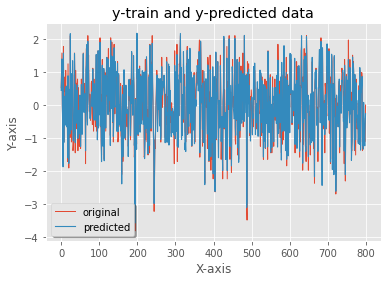

In [158]:
#Graficar las diferencias
x_ax = range(len(y_train))
plt.plot(x_ax, y_train, linewidth=1, label="original")
plt.plot(x_ax, y_pred_train, linewidth=1.1, label="predicted")
plt.title("y-train and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

##### Se utiliza el modelo entrenado para predecir los datos de pruebas ya que esto nos permite ver y entender como fue el comportamiento con los datos de pruebas

In [159]:
#Utilizar el modelo entrenado para predecir los datos de entranamientos
y_pred = sgdr.predict(X_test)

In [160]:
#Evaluar el modelo 
MSE = mean_squared_error(y_test, y_pred)
RMSE = mean_squared_error(y_test, y_pred)**0.5
print("MSE: ",MSE)
print("RMSE: ",RMSE)

MSE:  0.08214947097455763
RMSE:  0.28661729008306114


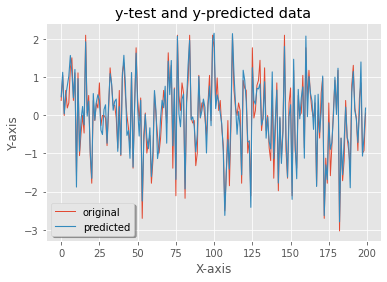

In [161]:
#Graficar las diferencias
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [162]:
# Mostrar el error de madiana y promedio absoluto 
print("median_absolute_error:",median_absolute_error(y_test,y_pred))
print("mean_absolute_percentage_error:",mean_absolute_percentage_error(y_test,y_pred))

median_absolute_error: 0.18703596888894702
mean_absolute_percentage_error: 3.8762323231294373


#### Análisis y conclusión del modelo SGD Regressor

De los 5 aolgortimos que se utilizaron para este poyecto, con el SGD Regressor obtuve el mejor resultado. Según la página de Scikit Learn, el regresor de descenso gradiente estocástico (SGD)  implementa una rutina de aprendizaje SGD simple que soporta varias funciones de pérdida y penalizaciones para ajustar modelos de regresión lineal. 

Como ya se ha mencionado anteriormente para este proyecto el conjunto utilizado no es tan grande para entrenamiento, pero el resultado obtenido de este algoritmo estuvo muy bueno. Este algoritmo puede servir muy bien para conjuntos de datos más grandes,  puede converger más rápido ya que provoca actualizaciones de los parámetros con mayor frecuencia.

El MSE obtenido en este caso es un valor menor que 1, y considero que este resultado bueno es debido a las actualizaciones frecuentes, los pasos dados hacia los mínimos de la función de pérdida tienen oscilaciones que pueden ayudar a salir de los mínimos locales de la función de pérdida (en caso de que la posición calculada resulte ser el mínimo local).

Por otro lado, es importante mencionar que a través de las pruebas debido a las frecuentes actualizaciones, los pasos dados hacia los mínimos cuadrados son ruidosos, y esto puede varia mucho el descenso del grandiente hacia otras direcciones. 

Al ser un conjunto de datos pequeño casi no se nota, pero muy posiblemente desde el punto de vista computacional las actualizaciones frecuentes son costosas, ya que se requiere utilizar los recursos para procesar una muestra de entrenamiento cada vez.

Analizando los resultados con los datos de entrenamientos y los de pruebas, se puede observar que los valores andan muy parecidos, y se puede decir que el modelo es bueno para ambos casos. Muchas veces pasan que el modelo es muy bueno con los valores de entrenamiento pero con pruebas no. Igualmente como se pueden ver en las gráficas anteriores, los resultados andan muy parecidos por eso se obtuvo un score de 92%.

### Linear Regression

##### Separar los datos para entrenamientos(80%) y para pruebas (20%)

In [163]:
X_train,X_test,y_train,y_test=train_test_split(data,target,test_size=0.2)

##### Entrenamos el modelo usando hiperparámetros y ajustar el modelo con los datos de entranamiento

In [164]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

##### Se utiliza el modelo entrenado para predecir los datos de entranamientos ya que esto nos permite ver y entender como fue el comportamiento con los datos de entrenamiento

In [165]:
#Utilizar el modelo entrenado para predecir los datos de entranamientos
y_pred_train = regressor.predict(X_train)

In [166]:
#Evaluar el modelo 
MSE = mean_squared_error(y_train, y_pred_train)
RMSE = mean_squared_error(y_train, y_pred_train)**0.5
print("MSE: ",MSE)
print("RMSE: ",RMSE)

MSE:  17.384296226091344
RMSE:  4.169447952198389


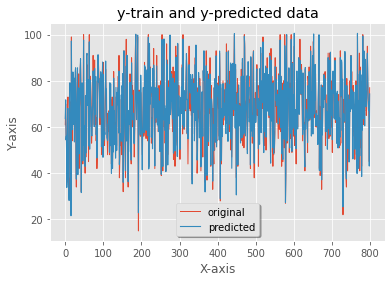

In [167]:
#Graficar las diferencias
x_ax = range(len(y_train))
plt.plot(x_ax, y_train, linewidth=1, label="original")
plt.plot(x_ax, y_pred_train, linewidth=1.1, label="predicted")
plt.title("y-train and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

##### Se utiliza el modelo entrenado para predecir los datos de pruebas ya que esto nos permite ver y entender como fue el comportamiento con los datos de pruebas

In [117]:
#Utilizar el modelo entrenado para predecir los datos de pruebas
y_pred = regressor.predict(X_test)

In [118]:
#Evaluar el modelo 
MSE = mean_squared_error(y_test, y_pred)
RMSE = mean_squared_error(y_test, y_pred)**0.5
print("MSE: ",MSE)
print("RMSE: ",RMSE)

MSE:  14.021997041164141
RMSE:  3.744595711310387


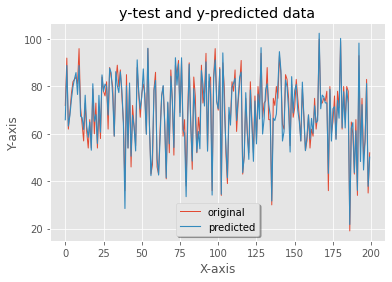

In [119]:
#Graficar las diferencias
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [120]:
# Mostrar el error de madiana y promedio absoluto 
print("median_absolute_error:",median_absolute_error(y_test,y_pred))
print("mean_absolute_percentage_error:",mean_absolute_percentage_error(y_test,y_pred))

median_absolute_error: 2.6790485660116232
mean_absolute_percentage_error: 0.045556051495923226


#### Análisis y conclusión del modelo Linear Regression

Con el algoritmo de Linear regression obtuve un resultado promedio, la regresión linear es la manera más simple de predecir los valores si uno no utiliza alguna biblioteca. La regresión linear es una técnica muy común, con este se puede predecir el resultado de una variable dependiente en función de las variables independientes, la relación entre las variables es lineal.

El MSE obtenido usando Regresión Lineal es de 14.021997041164141 y RMSE de 3.744595711310387.Los porcentajes de error de medianan y promedio absoluto son bajos. Pero al ser un conjunto pequeño los resultados fueron buenos en realidad.

Creo que los resultados predichos no fueron tan buenos comparados conotros debido a que es un algoritmo que suele ser propense al ruido y al sobreajuste. En este caso posiblemente sea por sobreajuste al no eliminar los valores extremos de las notas de los cursos.Por otro lado, este algoritmo como el RGD puede manejar bien el sobreajuste mediante técnicas de reducción dimensional y cross validantion que se conoce como validación cruzada.

### Análisis de resultados

En general, los resultados obtenidos de los 5 algoritmos estuvieron buenos, con Random Forest y RGD regressor obtuvimos los mejores resultados. Los resultados se vieron mejoras al usar todas las columnas con numéricas y cada modelo cuenta con los hiperparámetros adecuados para el entrenamiento. 

A lo largo de este proyecto, estuve probando diferentes hiperparámetro y usando diferentes características y el valor que más afecta el número de estimadores, ya que si el número de estimadores es un valor grande posiblemente el resultado sea mejor, ya que el modelo se va a ir mejorando. 

Por otro lado, las características más importantes para predecir el resultado de writing fueron las siguientes: preparación para las pruebas, almuerz y notas de reading. Con este proyecto y a través de las pruebas se pueden concluir que los hábitos de los estudiantes tienen bastante relación con las notas de writing. Cuando hice el EDA, también me di cuenta que los estudiantes que obtienen notas altas en reading también presentan buenas notas en writing con una buena preparación.

### Posibles mejoras

Considero que al aumentar la cantidad de estimadores de entrenamiento puede mejorar el resultado, pero se debe mantener un balance, ya que a la hora de subir más estimadores muy posiblemente su dura más construyendo el modelo. A través de las pruebas que se hicieron nos dimos cuenta de que mientras más grande sea la cantidad de épocas el resultado es mejor, es decir mayor exactitud del modelo.
    
El otro factor muy importante es encontrar los hiperparámetros más adecuados, para esto se debe realizar diferentes pruebas, y nos dimos cuenta mientras más capas entrenen el modelo y el resultado se ve mejor.

Se debe hacer un buen preprocesamiento de datos antes de entrenar el modelo, en el caso de este ejemplo que se dicidió que todas las columnas fueran númericas.

Para este proyecto solo se utilizó 800 datos para entrenar el modelo, y el resultado obtenido fue bueno, pero considero que el resultado mejorará si tuviera una cantidad más grande de  datos para el entrenamiento.


## Referencias

- Recarey R. (2020). Métodos de ensamblado en Machine Learning.

- Scikit. (s.f.). Decision Trees. https://scikit-learn.org/stable/modules/tree.html

- Simplilearn. (2022, April 22). An In-depth Guide to SkLearn Decision Trees. https://www.simplilearn.com/tutorials/scikit-learn-tutorial/sklearn-decision-trees

- Jason B. (2021, April 27). How to Develop a Bagging Ensemble with Python.https://machinelearningmastery.com/bagging-ensemble-with-python/

- Scikit. (s.f.). RandomForestRegressor https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

- rashida048. (2022, 18 de enero). Exploratory Data Analysis with Advanced Visualizations in Python’s Matplotlib and Seaborn Library. https://regenerativetoday.com/exploratory-data-analysis-with-advanced-visualizations-in-pythons-matplotlib-and-seaborn-library/

- Kaggle. (2018). Exploratory Analysis with Seaborn. https://www.kaggle.com/code/jsaguiar/exploratory-analysis-with-seaborn/notebook

- Seaborn. (s.f.). Seaborn https://seaborn.pydata.org/introduction.html]

- Anónimos. (s.f.). Regression Example with SGDRegressor in Python. https://www.datatechnotes.com/2020/09/regression-example-with-sgdregressor-in-python.html


- Scott Robinson. (s.f.). Linear Regression in Python with Scikit-Learn. https://stackabuse.com/linear-regression-in-python-with-scikit-learn/